In [1]:
from vpython import*
import math
import matplotlib.pyplot as plt
%matplotlib inline

# plot position vs time
def plotH(x, y, i):
    plt.plot(x,y,label="H" + str(i + 1))
    plt.xlabel("Time(s)")
    plt.legend()
    
# plot velocity vs time   
def plotV(x, y, i):  
    plt.plot(x, y, label="V" + str(i + 1))
    plt.xlabel("Time")
    plt.legend()

# update ball velocity and position
def updateBall():
    ball.velocity.y = ball.velocity.y + g * dt
    ball.pos = ball.pos + ball.velocity * dt

g = -9.8

<IPython.core.display.Javascript object>

# Comments for all simulations

1. Time step *dt* is .01 with a *rate* of 100 to execute 100 times per 1 second
2. Units are: seconds, $m/s$, $m/s^{2}$, kilograms, and meters
3. $t_{0} = 0s$
4. $g = 9.8 m/s^{2}$




# a.) Ball falling at acceleration due to gravity

**Assumptions**

1. No external forces acting upon the ball.
2. *Initial height* $h_{0}$ is 50m.
3. Executed for 3.19s (time for ball to reach y = 0m).

In [2]:
scene=canvas()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Velocity(m/s) or Height(m)')

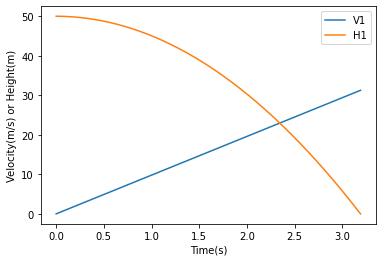

In [3]:
sphere(pos=vector(0,0,0),texture="https://i.imgur.com/1nVWbbd.jpg",radius=125,shininess=1)
scene.range = 50

scene.camera.pos=vector(-45.8483, 66.8704, 59.0219)
scene.camera.axis=vector(50.2367, -37.6691, -59.6432)

ball = sphere(pos=vector(0,50,0), radius=1, color=color.yellow) #initial height is set to 50m
ball.velocity=vector(0, 0, 0)
floor = box(pos=vector(0, -1, 0), size=vector(10, 0.5, 10), color=color.red)

# lists to store values of time, velocity, and position each timestep to graph
vel = [] 
time = []
pos = []

dt = 0.01
t = 0

while (t < 3.19):
    rate(100)
    vel.append(abs(ball.velocity.y)) # update velocity list
    time.append(t) # update time list
    pos.append(ball.pos.y) # update position list
    
    # after 100 time steps ball's velocity increases 9.8m/s per 100 time steps
    updateBall()
    t += dt

plotV(time, vel, 0)
plotH(time, pos, 0)
plt.ylabel("Velocity(m/s) or Height(m)")


# Results

The line for velocity is linear with a slope of 9.8 which aligns with our expectations considering the slope on a velocity vs time graph represents acceleration.  The slope of the position as a function of time is non linear is consistent with our expectations considering that the ball's velocity is increasing an additional 9.8 $m/s$ every second.

# b.) Ball bouncing 

**Assumptions**
1. falling at acceleration due to gravity
2. elastic collision
3. initial height at y = 10m

In [4]:
scene2 = canvas(background=color.cyan)

<IPython.core.display.Javascript object>

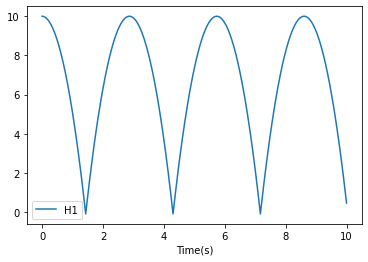

In [5]:
scene2.camera.pos=vector(9.11524, 14.5809, 15.5572)
scene2.camera.axis=vector(-9.11524, -14.5809, -15.5572)

ball = sphere(pos=vector(0,10,0), radius=1, color=color.yellow)
ball.velocity=vector(0, 0, 0)
floor = box(pos=vector(0,0,0), size = vector(10,0.25,10), color=color.blue)

t = 0
dt = 0.01

h = []
time = []

while t<10 :
    rate(100)
    h.append(ball.pos.y)
    time.append(t)
    
    updateBall()
    
    if (ball.pos.y < floor.pos.y):
        ball.velocity.y = -ball.velocity.y - g * dt # convert kinetic energy back to gravitational potential energy

    t += dt
    
plotH(time, h, 0)

# Results

This simulation demonstrates conservation of energy, where the ball starts with gravitational potential energy, converts that into kinetic energy, and back into gravitational potential energy gradually as the ball bounces off the floor and returns to its original height; assuming no other forces are acting on the ball.  Verification was done by plotting the height with respect to time and observing that the ball returns to its initial height at each bounce.


# c.) Ball Launced from Cannon 

**Comments**
1. $x = v_{0x}t$
2. $y = v_{0y}t - 1/2gt^{2}$
3. $R_{x} = \frac{V^{2}sin(2\theta)}{g}$
4. $V = \sqrt{v_{0x}^{2} + v_{0y}^{2}}$
5. $h_{max} = \frac{V^{2}sin(2\theta)^{2}}{2g}$
6. $t_{f} = \frac{2Vsin(\theta)}{g}$

**Assumptions**
1. Acceleration in Y direction is accerlation due to gravity.
2. No external forces acting on the ball.
3. $v_{x0}$ and $v_{y0}$ are 40$m/s$.

In [6]:
scene3=canvas(title="Shooting Balls")

<IPython.core.display.Javascript object>

In [7]:
scene3.camera.pos=vector(349.885, 65.0822, 104.874)
scene3.camera.axis=vector(-279.441, -152.656, -212.783)

init_Vx = 40
init_Vy = 40
v_mag = sqrt(init_Vx**2 + init_Vy**2) # magnitude of velocity
theta = atan(init_Vy / init_Vx) # angle of trajectory in radians
rx = (v_mag**2 *sin(2*theta)) / 9.8 # x range of ball
h = (v_mag**2 *(sin(2*theta)**2)) / 19.6 # max height of ball trajectory

# create cannon
cannon = extrusion(path=[vector(init_Vx/2, init_Vy/2, 0), vector(0, 0, 0)], pos=vector(0, 0, 0), 
                   shape=shapes.circle(pos=(0, 0), radius=4), color=color.blue)
wheel1 = cylinder(pos=vector(-3, -5, 4), axis=vector(0,0,5), radius=8)
wheel2 = cylinder(pos=vector(-3, -5, -9), axis=vector(0,0,5), radius=8)

# floor's size is dependent on the range of ball calculated from initial velocities
floor = box(pos=vector(0, -init_Vy/3, 0), size = vector(2*rx,1,rx/2), color=color.cyan)
t = 0
dt = 0.01

# function to update ball's position every time step
def position(t):
    x = init_Vx * t # x = V_0x*t
    y = init_Vy * t - 0.5 * 9.8 * t ** 2 # y = V_0y*t-(1/2)g*t^2
    ball.pos = vector(x, y, 0)

ball = sphere(pos=vector(0, 0, 0), radius=2.5, color=color.yellow, make_trail=True)

endTime = (2 * v_mag * sin(theta)) / 9.8

#run loop for duration of calculated time
while t < endTime:
    rate(100)
    position(t)
    t += dt
        
print("Time: " + str(endTime) + " s\n")
print("Range: " + str(rx) + " m\n")
print("Max height: " + str(h) + " m\n")
    

Time: 8.16326530612245 s

Range: 326.530612244898 m

Max height: 163.265306122449 m



# Results

The basic principles of projectile motion are demonstrated in this simulation.  In this example where the angle of the cannon is $45^{\circ}$ (The ratio of the initial velocity components is 1) is the maximum height in which the projectile can reach.  Verification of the accuracy for this simulation was done by comparing the program's calculated values for $t_{f}$, $R_{x}$, and $h_{max}$.  Other values for velocities were tested and also validated.

# d.) Ball falling at accerlation due to gravity

**Assumptions**
1. Same assumptions as a.).

**Info**
1. Simulation runs 3 times using different values for initial height (10m, 50m, and 100m).
2. Each simulation is plotted as Velocity vs Time and Height vs Time.
3. The maximum velocity is printed for each simulation.


In [8]:
scene4=canvas()

<IPython.core.display.Javascript object>

Max velocity 1: 13.916000000000038 m/s
Max velocity 2: 31.261999999999894 m/s
Max velocity 3: 44.19799999999976 m/s


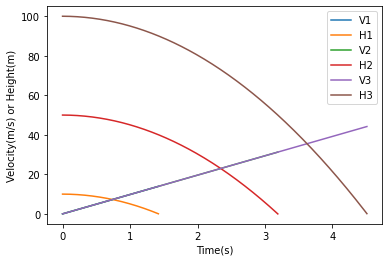

In [9]:
sphere(pos=vector(0,0,0),texture="https://i.imgur.com/1nVWbbd.jpg",radius=250,shininess=1)
scene4.range = 50


h = [10, 50, 100]
for i in range(3) :
    ball = sphere(pos=vector(0, int(h[i]), 0), radius=1, color=color.yellow) #initial height is set to 50m
    ball.velocity=vector(0, 0, 0)
    floor = box(pos=vector(0, -1, 0), size=vector(10, 0.5, 10), color=color.red)
    scene4.camera.follow(ball)
    
    dt = 0.01 
    t = 0 

    # lists to store values of time, velocity, and position each timestep to graph
    vel = [] 
    time = []
    pos = []

    runTime = sqrt((2 * int(h[i])) / 9.8) # calculate time the ball takes to reach y = 0m

    while (t < runTime):
        rate(100)
        vel.append(abs(ball.velocity.y)) # update velocity list
        time.append(t) # update time list
        pos.append(ball.pos.y) # update position list

        updateBall()
        t += dt
        
    maxVel = max(vel)
    print("Max velocity " + str(i + 1) + ": " + str(maxVel) + " m/s")

    plotV(time, vel, i)
    plotH(time, pos, i)
    plt.ylabel("Velocity(m/s) or Height(m)")
    
    ball.visible=False
    floor.visible=False


# d.) Ball falling at accerlation due to gravity with air resistance

**Comments**

1. $F_{drag} = \frac{C_{d}pV^{2}A}{2}$
2. Using Newton's second law: $F = ma$
3. $a = \frac{F_{drag}}{m} = \frac{mg - F_{drag}}{m}$

**Assumptions**
1. mass of ball = 50kg
2. $C_{d} = 0.5$ (typical Coefficient of drag for a sphere)
3. $p = 1.225 kg/m^{3}$ (typical density for air)
4. $Area = 4\pi r^{2}$ (area of a sphere)

In [12]:
scene5=canvas(background=color.cyan)

<IPython.core.display.Javascript object>

Max velocity 1: 10.023215191330422 m/s
Max velocity 2: 11.281399922971618 m/s
Max velocity 3: 11.283790653462257 m/s


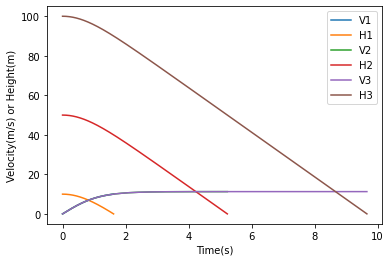

In [13]:
h = [10, 50, 100]
for i in range(3) :
    ball = sphere(pos=vector(0, int(h[i]), 0), radius=1, color=color.yellow) #initial height is set to 50m
    ball.velocity=vector(0, 0, 0)
    floor = box(pos=vector(0, 0, 0), size=vector(10, 0.25, 10), color=color.red)

    dt = 0.01
    t = 0
    ball.acceleration = vector(0,g,0)
    drag_coef = 0.5
    rho = 1.225
    mass = 50
    area = 4 * 3.14 * ball.radius **2
    
    vel = [] 
    time = []
    pos = []

    while (ball.pos.y > 0):
        rate(100)
        vel.append(abs(ball.velocity.y)) # update velocity list
        time.append(t) # update time list
        pos.append(ball.pos.y) # update position list
        
        # update the ball's position and velocity at each time step
        ball.pos = ball.pos + ball.velocity * dt
        ball.velocity.y = ball.velocity.y + ball.acceleration.y * dt
        
        # solving for acceleration from equation 3 under comments and changing sign appropriately for force direction
        ball.acceleration.y = -(mass * 9.8 - (2 * math.pi * drag_coef * rho * ball.velocity.y ** 2)) / mass
        t += dt
        
    maxVel = max(vel)
    print("Max velocity " + str(i + 1) + ": " + str(maxVel) + " m/s")

    plotV(time, vel, i)
    plotH(time, pos, i)
    plt.ylabel("Velocity(m/s) or Height(m)")
    
    ball.visible=False
    floor.visible=False

# Results

In the first simulation without air resistance, for each iteration with increasing height, the velocity increases and would increase without limitation with no external forces acting on the ball.  We observe from the graph that velocity continues to increase linearly.  In the second simulation that factors in air resistance, we can observe from the graph that for velocity increases linearly then becomes constant when $F_{drag}$ equals $mg$ making acceleration 0 and velocity constant (Terminal Velocity).  Observing height as a function of time, we see a similar curve at the start and then a linearly decreasing line consistent with our expectations considering the that derivative of position vs time is velocity.  Where height intersects velocity on each graph is the maximum velocity at its respective height.

# e.) Ball bouncing inelastically

**Comments**
1. Coefficient of Restitution = $\frac{v_{after}}{v_{before}}$ 
    1. Velocities before and after collision
2. $v_{after} = v_{before}COR$
3. Where $COR = 1$ is perfectly elastic and $COR = 0$ is perfectly inelastic.
  
**Assumptions**
1. COR = 0.8
2. $h_{0} = 20m$
3. Ball falls at $9.8m/s^{2}$
4. No other forces acting on the ball 


In [14]:
scene6=canvas()

<IPython.core.display.Javascript object>

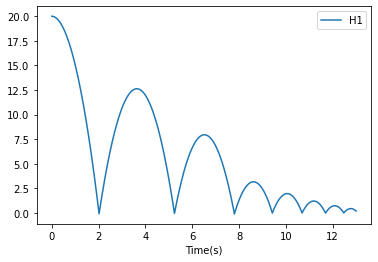

In [15]:
sphere(pos=vector(0,0,0),texture="https://i.imgur.com/1nVWbbd.jpg",radius=75,shininess=1)
scene6.range = 45


ball = sphere(pos=vector(0,20,0), radius=1, color=color.yellow)
ball.velocity=vector(0, 0, 0)
floor = box(pos=vector(0,0,0), size = vector(10,0.25,10), color=color.cyan)

dt = 0.01
t = 0
cor = 0.8

h = []
time = []

while (t<13):
    rate(100)
    h.append(ball.pos.y)
    time.append(t)
    
    scene6.camera.pos=vector(17.6062, 14.1214 , 16.5177 - 4*t)
    scene6.camera.axis=vector(-19.6865, -9.09437, -19.1198 + 5*t)
    
    updateBall()

    if (ball.pos.y < floor.pos.y):
        v2 = cor * abs(ball.velocity.y) # calculate velocity after collision from COR
        ball.velocity.y = v2
    t += dt
    
plotH(time, h, 0)

# Results

This simulation demonstrates conservation of energy factoring in the losses from internal forces (elasticity of the ball) using a coefficient of restitution *e* of 0.8, where 1 would be perfectly elastic and 0 would be perfectly inelastic.  This was verified by plotting the ball's position with respect to time and observing the consistency of the next height $h_{1} = e^{2}h_{0}$ at each bounce.  In this case, $e = 0.8$ so after the first bounce the ball should reach $h_{1} = 12.8m$.  